In [1]:
from setup import cfg
from hydra.utils import instantiate

In [2]:
import numpy as np
import torch
import torchvision.transforms.functional as F
from torchvision.ops import box_convert

from data.cctv_dataset import CCTVDataset
from torchvision.transforms import v2 as T

from utils.transform import SquarePad

/home/qninhdt/miniconda3/envs/cctv-od/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = CCTVDataset("../datasets/unclean_cctv/")

In [4]:
loader = iter(dataset)

In [5]:
import matplotlib.pyplot as plt


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

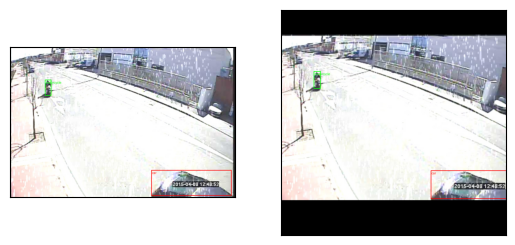

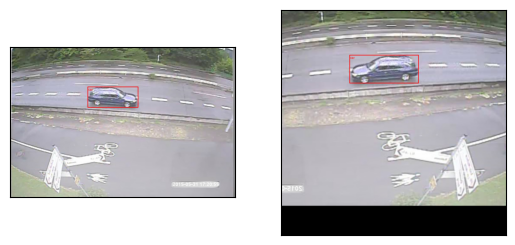

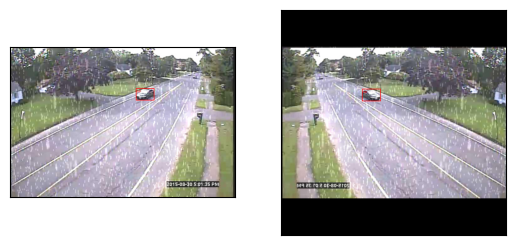

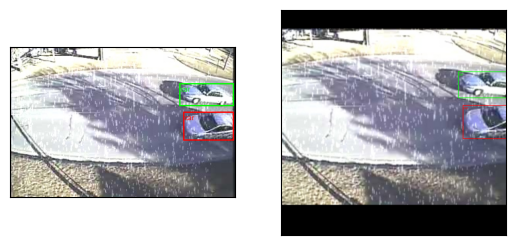

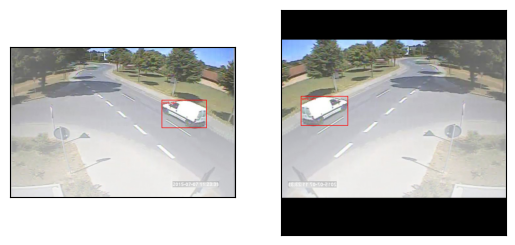

In [6]:
from torchvision.utils import draw_bounding_boxes

colors = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (0, 255, 255),
    (255, 255, 0),
    (255, 0, 255),
    (80, 70, 180),
    (250, 80, 190),
    (245, 145, 50),
    (70, 150, 250),
    (50, 190, 190),
]

IMAGE_SIZE = 720

transforms = T.Compose(
    [
        SquarePad(),
        T.RandomHorizontalFlip(p=0.5),
        T.RandomResizedCrop(IMAGE_SIZE, (0.2, 1), (1, 1), antialias=True),
    ]
)


def get_sample_img(sample):
    img = sample["image"]
    boxes = sample["boxes"]
    boxes = box_convert(boxes, in_fmt="cxcywh", out_fmt="xyxy")
    drawn_boxes = draw_bounding_boxes(
        img,
        boxes,
        width=2,
        colors=colors[: len(sample["labels"])],
        labels=[dataset.get_category(i) for i in sample["labels"]],
    )
    return drawn_boxes


for i in range(5):
    sample = next(loader)
    transformed = transforms(sample)

    show([get_sample_img(sample), get_sample_img(transformed)])

In [7]:
model =  instantiate(cfg.model)
data = instantiate(cfg.data)

new_params = [name for name, param in model.named_parameters()]

In [8]:
data.setup()
loader = iter(data.train_dataloader())

In [10]:
for i in range(1000):
    batch = next(loader)

    for target in batch[1]:
        print(target['type'])

rain
rain
rain
snow
rain
snow
snow
snow
rain
rain
rain
fog
rain
snow
snow
snow
fog
fog
fog
fog
snow
fog
rain
snow
snow
rain
rain
rain
fog
rain
snow
fog


fog
snow
rain
snow
rain
fog
snow
snow
snow
rain
snow
fog
snow
snow
snow
fog
rain
rain
rain
snow
snow
fog
rain
rain
snow
rain
fog
snow
rain
snow
snow
rain
fog
fog
fog
fog
rain
fog
fog
fog
fog
snow
snow
rain
fog
fog
snow
snow
snow
rain
fog
fog
fog
snow
snow
fog
fog
fog
fog
snow
fog
snow
rain
rain
rain
fog
fog
rain
fog
fog
fog
snow
rain
rain
snow
snow
snow
snow
snow
rain
fog
snow
fog
rain
fog
fog
snow
rain
fog
rain
snow
snow
rain
fog
fog
snow
fog
snow
rain
rain
rain
rain
rain
fog
snow
fog
fog
snow
fog
snow
fog
snow
rain
fog
fog
snow
fog
fog
rain
fog
snow
rain
rain
snow
rain
rain
snow
fog
snow
rain
snow
rain
snow
snow
snow
fog
snow
rain
fog
snow
rain
rain
fog
snow
rain
rain
rain
rain
snow
snow
snow
snow
fog
fog
fog
rain
fog
snow
fog
snow
rain
snow
snow
rain
rain
fog
snow
rain
fog
fog
fog
fog
rain
fog
rain
snow
rain
snow
fog
fog
fog
snow
snow
fog
fog
snow
snow
snow
fog
fog
snow
fog
snow
snow
fog
fog
fog
rain
snow
rain
snow
rain
fog
rain
snow
fog
fog
snow
snow
rain
fog
fog
fog
snow
rain
fog
